# Modelagem dataset professores  com  árvore de decisão

## Importando as Bibliotecas Necessárias

In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as pyplot
import seaborn as sns
%matplotlib inline

## Carregando o dataset

In [2]:
#Carregando o Datset
pathTeach='00-Bases-de-dados/Professores-Otimizada-Niveis/pisa-professores.csv'
professoresDF =  pd.read_csv(pathTeach)
professoresDF = professoresDF.drop(['Unnamed: 0'],axis=1) # 


In [3]:
professoresDF.describe()

,TC001Q01NA,TC002Q01NA,TC186Q01HA,TC005Q01NA,TC007Q01NA,TC007Q02NA,TC188Q01HA,TC014Q01HA,TC015Q01NA,TC018Q01NA,...,TC192Q01HA,TC192Q02HA,TC192Q05HA,TC176Q01HA,TC176Q02HA,TC176Q03HA,TC176Q06HA,TC176Q07HA,TC172Q01HA,TC173Q01HA
count,41687.000000,41687.000000,41687.000000,41687.00000,41687.000000,41687.000000,41687.000000,41687.000000,41687.000000,41687.000000,...,41687.00000,41687.000000,41687.000000,41687.000000,41687.000000,41687.000000,41687.000000,41687.000000,41687.000000,41687.000000
mean,1.436083,42.610982,1.129153,1.29081,9.055989,15.797803,1.582916,1.800537,1.447310,0.395567,...,2.90539,2.947154,3.137981,4.192050,4.286516,4.293929,2.942884,3.997865,2.826996,3.454578
std,0.495904,9.917561,0.335373,0.73051,8.354290,9.721441,1.109501,0.629758,1.061059,0.488978,...,0.75679,0.763193,0.741248,0.961431,1.066582,0.889407,1.119380,0.918980,0.916123,1.112767
min,1.000000,20.000000,1.000000,1.00000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,35.000000,1.000000,1.00000,2.000000,8.000000,1.000000,1.000000,1.000000,0.000000,...,2.00000,2.000000,3.000000,4.000000,4.000000,4.000000,2.000000,3.000000,2.000000,3.000000
50%,1.000000,42.000000,1.000000,1.00000,6.000000,15.000000,1.000000,2.000000,1.000000,0.000000,...,3.00000,3.000000,3.000000,4.000000,5.000000,5.000000,3.000000,4.000000,3.000000,3.000000
75%,2.000000,50.000000,1.000000,1.00000,14.000000,23.000000,1.000000,2.000000,1.000000,1.000000,...,3.00000,4.000000,4.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000
max,2.000000,70.000000,2.000000,4.00000,50.000000,50.000000,4.000000,3.000000,5.000000,1.000000,...,4.00000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000


## Verificando o Balanceamento das classes

Alta     30339
Baixa    11348
Name: nivelCiencias, dtype: int64


/home/rochelly/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 0, 'Classes de Desempenho'), Text(0, 0.5, 'Quantidade')]

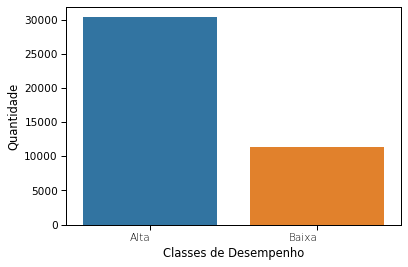

In [4]:
# ver o balanceamento das classes
print(professoresDF.nivelCiencias.value_counts())
#print("\nFraudes representam {:.4f}% do dataset.\n".format((professoresDF[professoresDF.nivelMatematica == 1].shape[0] / professoresDF.shape[0]) * 100))


#plt.figure(figsize=(10,5))
sns.set_context("paper",font_scale=1.2)
plot = sns.countplot('nivelCiencias', data=professoresDF);
sns.color_palette("tab10")
pyplot.xticks(
   #rotation=45, 
   horizontalalignment='right',
   fontweight='light',
   #fontsize='x-large'  
)
#pyplot.legend(loc='upper right')
plot.set(xlabel='Classes de Desempenho',ylabel='Quantidade')
#leg = plot.get_legend()

## Separando as variáveis x e y

In [5]:
from  sklearn.model_selection  import train_test_split

In [6]:
x = professoresDF.drop(['nivelMatematica','nivelCiencias'],axis=1) # 
y = professoresDF['nivelCiencias'] #  seleciona somente o que se quer prever 



## Aplicando o balanceamento das classes

In [7]:
#from imblearn.under_sampling import RandomUnderSampler, NearMiss, OneSidedSelection
#nm = NearMiss(version=1)
#x, y = nm.fit_resample(x, y)

In [8]:
df=pd.DataFrame(y)
print(df.nivelCiencias.value_counts())

Alta     30339
Baixa    11348
Name: nivelCiencias, dtype: int64


In [9]:
x

,TC001Q01NA,TC002Q01NA,TC186Q01HA,TC005Q01NA,TC007Q01NA,TC007Q02NA,TC188Q01HA,TC014Q01HA,TC015Q01NA,TC018Q01NA,...,TC192Q01HA,TC192Q02HA,TC192Q05HA,TC176Q01HA,TC176Q02HA,TC176Q03HA,TC176Q06HA,TC176Q07HA,TC172Q01HA,TC173Q01HA
0,1.0,40.0,1.0,1.0,10.0,10.0,1.0,2.0,1.0,1.0,...,3.0,3.0,3.0,4.0,3.0,4.0,3.0,4.0,2.0,2.0
1,2.0,26.0,1.0,1.0,5.0,5.0,1.0,1.0,1.0,0.0,...,2.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0
2,2.0,38.0,1.0,1.0,11.0,16.0,1.0,2.0,1.0,0.0,...,3.0,3.0,3.0,4.0,5.0,5.0,4.0,4.0,3.0,5.0
3,1.0,42.0,1.0,1.0,2.0,3.0,1.0,2.0,1.0,0.0,...,2.0,2.0,3.0,2.0,3.0,4.0,2.0,4.0,2.0,3.0
4,1.0,30.0,1.0,1.0,5.0,5.0,1.0,1.0,1.0,0.0,...,2.0,3.0,3.0,5.0,5.0,5.0,4.0,5.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41682,2.0,63.0,1.0,1.0,18.0,39.0,2.0,2.0,1.0,0.0,...,3.0,3.0,3.0,5.0,4.0,5.0,2.0,5.0,4.0,3.0
41683,1.0,49.0,1.0,2.0,14.0,14.0,1.0,1.0,1.0,1.0,...,3.0,2.0,2.0,5.0,5.0,5.0,3.0,4.0,2.0,2.0
41684,1.0,42.0,1.0,1.0,6.0,17.0,1.0,1.0,1.0,0.0,...,3.0,3.0,3.0,5.0,3.0,4.0,2.0,4.0,2.0,3.0
41685,2.0,25.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,3.0,3.0,3.0,5.0,4.0,4.0,3.0,4.0,1.0,3.0


In [10]:
y

0        Alta
1        Alta
2        Alta
3        Alta
4        Alta
         ... 
41682    Alta
41683    Alta
41684    Alta
41685    Alta
41686    Alta
Name: nivelCiencias, Length: 41687, dtype: object

##  Split do dataset  em treinamento e teste

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30)

### Verificando o formato dos dados de treinamento e teste

In [12]:
x_train.shape,x_test.shape

((29180, 83), (12507, 83))

In [13]:
y_train.shape,y_test.shape

((29180,), (12507,))

## Preparando o classificador  de árvore de decisão

In [14]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz


In [15]:
dtree =  DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [16]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [17]:
pred =dtree.predict(x_test)

In [18]:
dtree.feature_importances_

array([0.00763703, 0.02610392, 0.01264895, 0.01980279, 0.02022257,
       0.0227593 , 0.05911778, 0.01168381, 0.00871333, 0.02074254,
       0.00411111, 0.01649897, 0.00384389, 0.00344127, 0.00447718,
       0.01018814, 0.03022209, 0.00436406, 0.07268974, 0.00597619,
       0.01086258, 0.00480532, 0.00417598, 0.00825925, 0.00473108,
       0.03575409, 0.0055573 , 0.00573551, 0.03052943, 0.01454909,
       0.017473  , 0.00522955, 0.00463145, 0.00660154, 0.00301215,
       0.01637697, 0.00973164, 0.01259209, 0.02305673, 0.00691874,
       0.00734107, 0.00640842, 0.00595963, 0.00855719, 0.00515516,
       0.00472876, 0.00589715, 0.00775241, 0.00643917, 0.00399316,
       0.00431499, 0.00344707, 0.00582878, 0.0055719 , 0.00619791,
       0.00761617, 0.00857017, 0.00523983, 0.01019256, 0.01447738,
       0.02102415, 0.00403009, 0.01102094, 0.00635723, 0.01799839,
       0.00650885, 0.01071504, 0.01413847, 0.00975596, 0.00442714,
       0.00424913, 0.00550197, 0.00569897, 0.00783934, 0.00531

## Avaliando o modelo

In [19]:
for  feature, importancia in zip(professoresDF.columns,dtree.feature_importances_):
    print("{} , {}".format(feature,importancia))

TC001Q01NA , 0.007637027296843266
TC002Q01NA , 0.02610392193329614
TC186Q01HA , 0.012648951242270464
TC005Q01NA , 0.019802789242379663
TC007Q01NA , 0.020222566710910498
TC007Q02NA , 0.02275929528788973
TC188Q01HA , 0.059117778831591285
TC014Q01HA , 0.011683805347063583
TC015Q01NA , 0.008713329534350667
TC018Q01NA , 0.02074253534044788
TC018Q02NA , 0.0041111118950851976
TC018Q04NA , 0.016498966730586172
TC018Q05NA , 0.003843894439021038
TC018Q10NA , 0.0034412666297967778
TC018Q11NA , 0.004477179096622453
TC045Q09NA , 0.010188136317894796
TC193Q01HA , 0.030222090196921778
TC193Q02HA , 0.004364059356045922
TC020Q01NA , 0.07268973917654308
TC175Q01HA , 0.005976185110787607
TC198Q01HA , 0.010862579089889699
TC198Q02HA , 0.004805315916612184
TC198Q03HA , 0.004175976335092272
TC198Q06HA , 0.00825924641304018
TC198Q07HA , 0.004731083944421969
TC198Q08HA , 0.03575408884628092
TC198Q10HA , 0.005557297056391895
TC199Q01HA , 0.005735505234628688
TC199Q02HA , 0.0305294330429066
TC199Q03HA , 0.01454

In [20]:
from sklearn.metrics import  classification_report, confusion_matrix

In [21]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

        Alta       0.87      0.86      0.87      9079
       Baixa       0.65      0.65      0.65      3428

    accuracy                           0.81     12507
   macro avg       0.76      0.76      0.76     12507
weighted avg       0.81      0.81      0.81     12507



In [22]:
print(confusion_matrix(y_test,pred))

[[7851 1228]
 [1194 2234]]


## Matthews correlation coefficient (MCC).

In [23]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, pred)

0.5148575250526365